# Import Packages

In [31]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #Visualization
import seaborn as sns

# Read CSV

With this data of space missions fro 1957, we want to see the top 3 space companys that launched the most rockets/mi

In [32]:
#load the CSV file
space_missionsdf = pd.read_csv("data/Space_Corrected.csv")

#Take a look at the first 5 rows
space_missionsdf.head(5)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [33]:
#Drop columns Unnamed: 0 and Unnamed: 0.1
space_missionsdf.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

#rename column names 
space_missionsdf.rename(columns={'Datum':'Date','Status Rocket':'Rocket_status',' Rocket':'Cost_of_mission',
                   'Status Mission':'Mission_status'}, inplace=True)

#Check the first 5 rows again with the new column names
space_missionsdf.head()

,Company Name,Location,Date,Detail,Rocket_status,Cost_of_mission,Mission_status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [34]:
#Extract date into DateTime format in a new column
space_missionsdf['DateTime'] = pd.to_datetime(space_missionsdf['Date'])

# Extract the launch year in a new column
space_missionsdf['Year'] = space_missionsdf['DateTime'].apply(lambda datetime: datetime.year)

# Extract the country of launch in a new column
space_missionsdf["Country"] = space_missionsdf["Location"].apply(lambda location: location.split(", ")[-1])

#Drop old Date column 
space_missionsdf.drop(columns=['Date'], inplace=True)

#We are not going to investigate the details of the rocket in this analysis, so drop the 'Detail' column
space_missionsdf.drop(columns=['Detail'], inplace=True)

#check the column names 
space_missionsdf.head()

,Company Name,Location,Rocket_status,Cost_of_mission,Mission_status,DateTime,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA


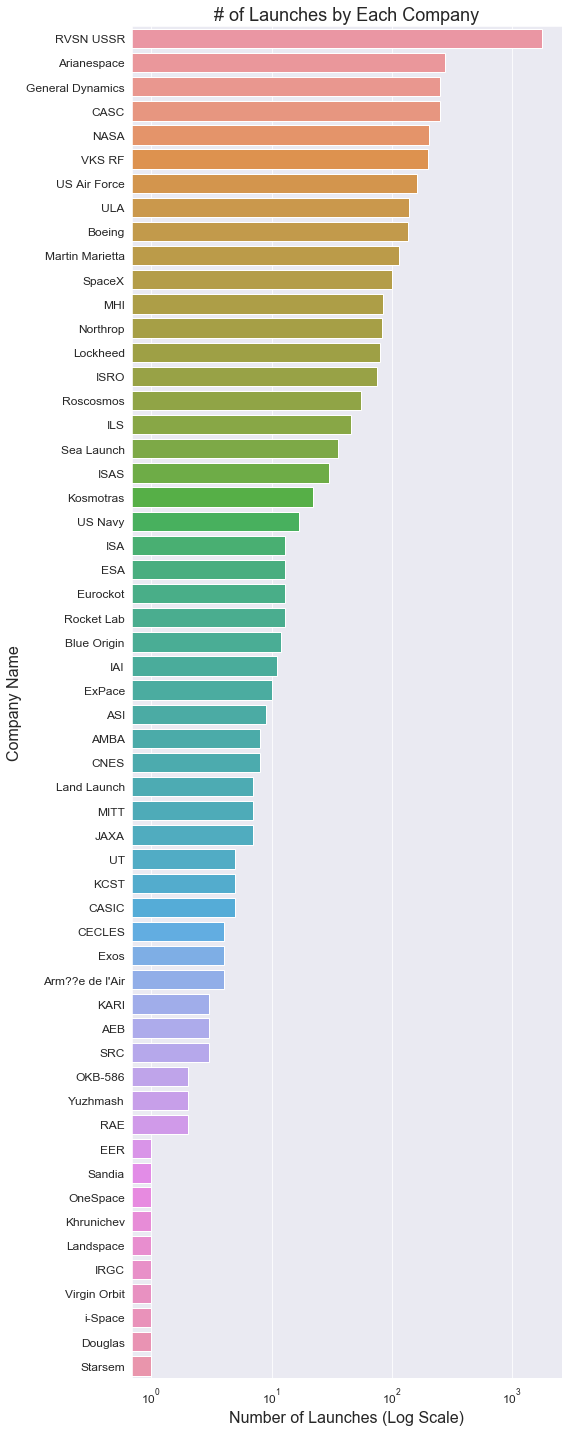

In [35]:
#Number of launches by company
plt.figure(figsize=(8,20))
ax = sns.countplot(y="Company Name", data=space_missionsdf, order=space_missionsdf["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("# of Launches by Each Company",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company Name",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

As we can see, RVSN USSR has the most number of launches. However, we must first ensure that those laucnhes have a recorded cost of mission. 

In [36]:
#Check the number of rows with null "NaN" value
space_missionsdf['Cost_of_mission'].isnull().sum()

3360

In [37]:
#drop those rows as we won't be investigating "NaN" values in this analysis
space_missionsdf = space_missionsdf.dropna()

#The remaining total number of rows after dropping all rows with null values
len(space_missionsdf.index)

964

In [38]:
#Convert all data types in Cost_of_mission column to a float, for all strings that cannot be coverted, 
#they will have their value set to NaN
space_missionsdf["Cost_of_mission"] = pd.to_numeric(space_missionsdf["Cost_of_mission"], errors='coerce')

#Check the data types of the columns
space_missionsdf.dtypes

Company Name        object
Location            object
Rocket_status       object
Cost_of_mission    float64
Mission_status      object
DateTime            object
Year                 int64
Country             object
dtype: object

In [39]:
#drop the new "NaN" cost of mission rows 
space_missionsdf = space_missionsdf.dropna()

#The remaining total number of rows after dropping all rows with null values
len(space_missionsdf.index)

949

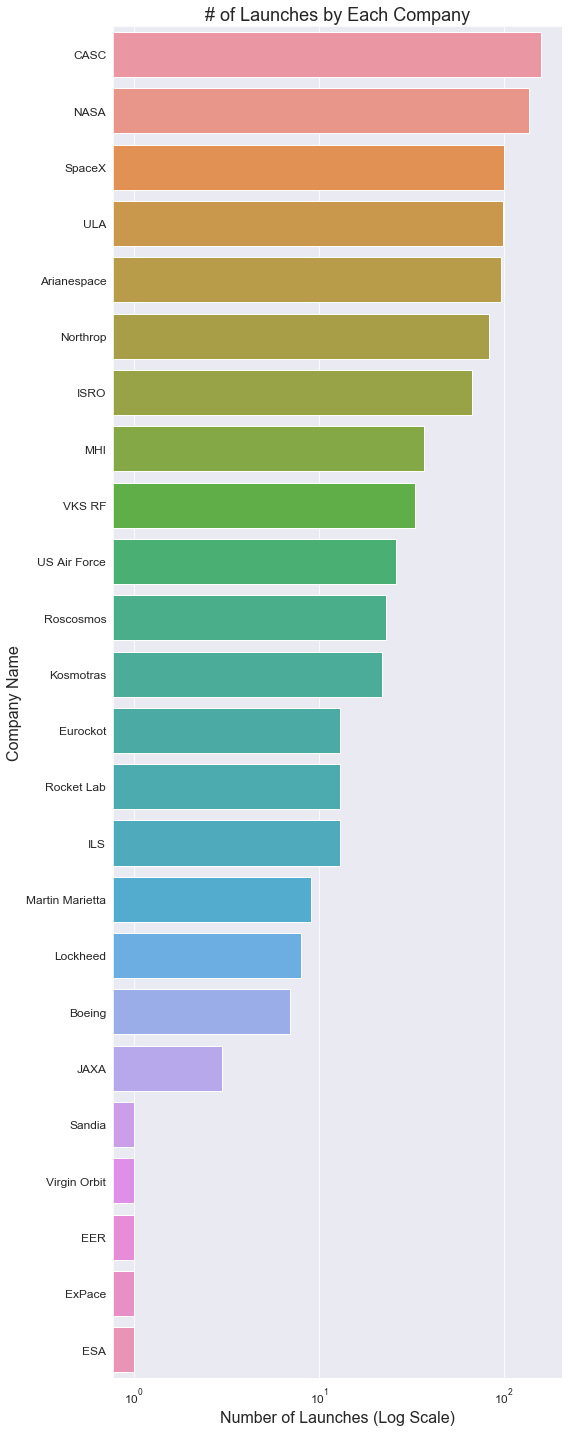

In [40]:
#Number of launches by company after removing Null Cost of mission values
plt.figure(figsize=(8,20))
ax = sns.countplot(y="Company Name", data=space_missionsdf, order=space_missionsdf["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("# of Launches by Each Company",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company Name",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [41]:
#Create a new df with only rows where Company Name is CASC
CASCdf = space_missionsdf[(space_missionsdf["Company Name"] == 'CASC')]
print(CASCdf["Cost_of_mission"].mean())
print(CASCdf["Cost_of_mission"].sum())

40.1282278481013
6340.260000000002


In [42]:
#Create a new df with only rows where Company Name is NASA
NASAdf = space_missionsdf[(space_missionsdf["Company Name"] == 'NASA')]
print(NASAdf["Cost_of_mission"].mean())
print(NASAdf["Cost_of_mission"].sum())

450.0
61200.0


In [43]:
#Create a new df with only rows where Company Name is SpaceX
SpaceXdf = space_missionsdf[(space_missionsdf["Company Name"] == 'SpaceX')]
print(SpaceXdf["Cost_of_mission"].mean())
print(SpaceXdf["Cost_of_mission"].sum())

54.98989898989899
5444.0
